# Grid
Líneas opacas que sirven como ayuda visual al lector para codificar los valores del gráfico a los valores en los ejes. 
- Es un elemento opcional de una visualización. 
- Si utilizamos una plantilla, esta va a configurar automáticamente los estilos de la cuadrícula. 
- Podemos configurar el estilo de las líneas del Grid, la opacidad, colores y en que eje aparecen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2016 = raw[(raw['anio'] == '2016') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2016[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 

# Pandas

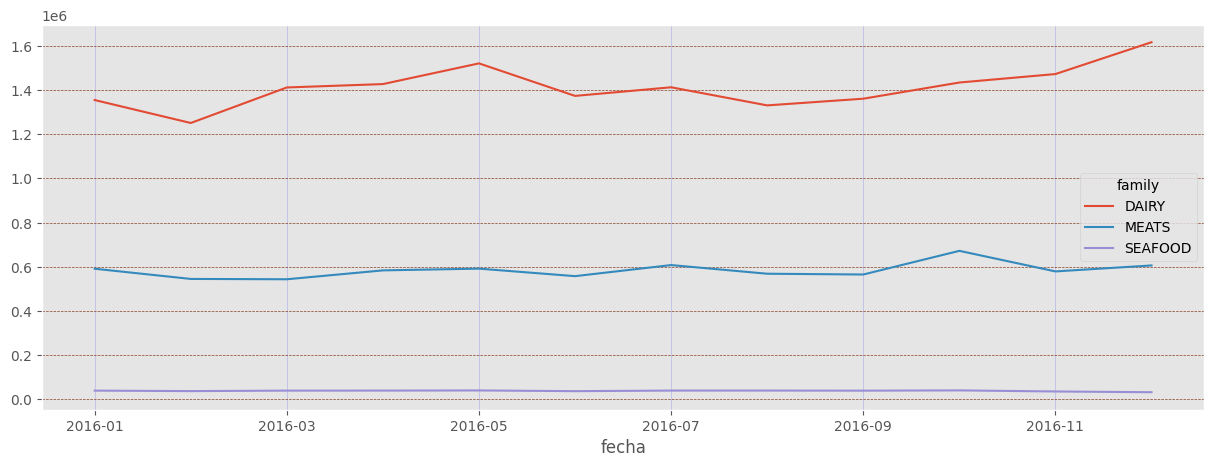

In [33]:
plt.style.use(
    'ggplot' 
)

# El metodo plot me retorna una referencia al objeto de mi gráfico
ax = df.plot.line(
    figsize=(15, 5) 
)

# Luego yo puedo empezar a configurar propiedades del gráfico, como el GRID
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html
ax.xaxis.grid(
    visible=True,
    linewidth=0.5, # Ancho de las líneas del Grid
    color='blue', # Colores predefinidos: https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors
    alpha=0.2 # Opacidad: Porcentaje del 0 al 1
)

ax.yaxis.grid(
    visible=True,
    linewidth=0.5,
    color='#873e23', # Puedo utilizar colores en HEX
    linestyle='dashed', # Estilos de Linea: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle  
)

# Seaborn

<AxesSubplot: ylabel='sales'>

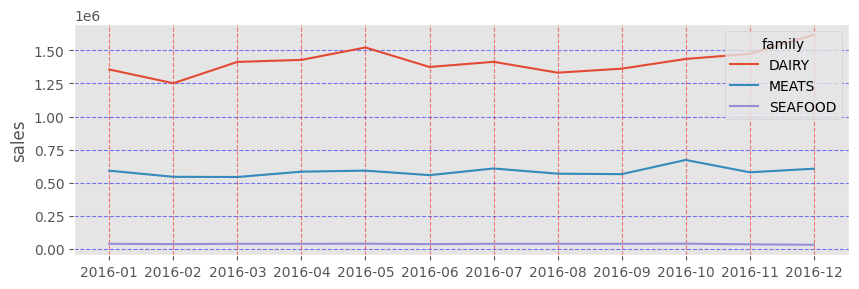

In [26]:
# Dimensiones en pulgadas -> (ancho, alto)
plt.figure(
    figsize=(10, 3)
)

# GRID: Metodo que funciona en Seaborn y Matplotlib
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

# Grid del Eje X
plt.grid(
    visible=True,
    axis='x',
    color='red',
    linestyle='--',
    alpha=0.5
)

# Grid del Eje Y
plt.grid(
    axis='y',
    color='blue',
    linestyle='--',
    alpha=0.5
)


sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family'
)

# Plotly

In [73]:
fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    color='family',
    width=800, 
    height=300,
    template='ggplot2'
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1, # Ancho de las líneas en pixeles
    gridcolor='black', # Colores disponibles: https://developer.mozilla.org/en-US/docs/Web/CSS/named-color
    griddash='dot', # Estilos de lineas: "solid", "dot", "dash", "longdash", "dashdot", o "longdashdot"
    minor_griddash='dot', # Estilos de los ejes menores
    # No hay forma de cambiar la opacidad
)

fig.show()